<a href="https://colab.research.google.com/github/Maddie-Foster/QLC240_exercises/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install netcdf4
import netCDF4
import urllib.request as urllib2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.7 MB/s eta 0:00:00


Below we are going to plot data from an ocean glider. Search the web.

1. What is an ocean glider?

An ocean glider is a self-propelled underwater robot that uses changes in buoyancy to move up and down, while wings allow it to glide forward, collecting data about the ocean. These gliders are like underwater drones that can travel for weeks or months, providing valuable information about the ocean's properties.
2. How does it move?

Ocean gliders move by changing their buoyancy to rise and fall, using wings to glide forward while collecting ocean data.

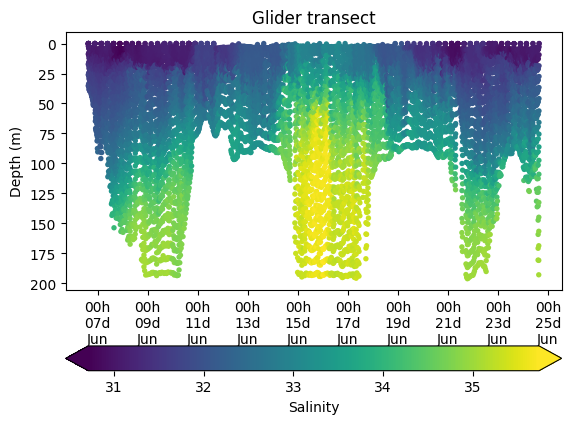

In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
from io import StringIO
# Retreive data from the "glider" server
response = urllib2.urlopen('http://glider.ceotr.ca/data/live/otn200_sci_water_sal_live.csv')
data = response.read().decode('utf-8')  # Decode the response to a string
data = StringIO(data)

# Read file
r = csv.DictReader(data)

# Initialize empty variables
date, lat, lon, depth, temp = [],[],[],[],[]

# Loop to parse data into our variables
for row in r:
    date.append(float(row['unixtime']))
    lat.append(float(row['lat']))
    lon.append(float(row['lon']))
    depth.append(float(row['depth']))
    temp.append(float(row['sci_water_sal']))

# Change unix-time into a date object (for easy plotting)
DATE = []
for row in date:
    DATE.append(datetime.datetime.fromtimestamp(row))

# Make plot
fig, ax1 = plt.subplots(1)
plt.scatter(DATE,depth,s=15,c=temp,marker='o', edgecolor='none')
#plt.ylim((-0.5,max(depth)+5))
ax1.set_ylim(ax1.get_ylim()[::-1])
cbar = plt.colorbar(orientation='horizontal', extend='both')
xfmt = md.DateFormatter('%Hh\n%dd\n%b')
ax1.xaxis.set_major_formatter(xfmt)
cbar.ax.set_xlabel('Salinity')
plt.title('Glider transect')
plt.ylabel('Depth (m)')
plt.show()

What is this plot showing? Can you gain any information about the water column at this location?

In [3]:
#The plot is showing the correlation between salinity and depth from data gathered by an ocean glider. The water column at this location had a noticeable increase in salinity between Jun 15d and 17d and between 50 and 200 meters.

Copy paste the above plot into the cell below. Now replace the following lines:

    response = urllib2.urlopen('http://glider.ceotr.ca/data/live/otn200_sci_water_sal_live.csv')

    temp.append(float(row['sci_water_sal']))

    cbar.ax.ser_xlabel('Salinity')

with:

    response = urllib2.urlopen('http://glider.ceotr.ca/data/live/otn200_sci_water_temp_live.csv')

    temp.append(float(row['sci_water_temp']))

    cbar.ax.ser_xlabel('Temperature (C)')

After replacing those lines, create a new cell below this one and run the following:

    #install cmocean package
    !pip install cmocean
    #import cmocean package
    import cmocean

Finally, go back to the plot you are making below and add the following variable to the plt.scatter(....) function:

    ,cmap=cmocean.cm.thermal


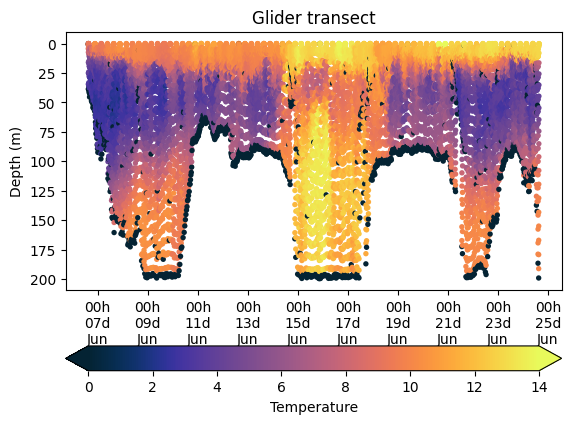

In [6]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
from io import StringIO
# Retreive data from the "glider" server
response = urllib2.urlopen('http://glider.ceotr.ca/data/live/otn200_sci_water_temp_live.csv')
data = response.read().decode('utf-8')  # Decode the response to a string
data = StringIO(data)

# Read file
r = csv.DictReader(data)

# Initialize empty variables
date, lat, lon, depth, temp = [],[],[],[],[]

# Loop to parse data into our variables
for row in r:
    date.append(float(row['unixtime']))
    lat.append(float(row['lat']))
    lon.append(float(row['lon']))
    depth.append(float(row['depth']))
    temp.append(float(row['sci_water_temp']))

# Change unix-time into a date object (for easy plotting)
DATE = []
for row in date:
    DATE.append(datetime.datetime.fromtimestamp(row))

# Make plot
fig, ax1 = plt.subplots(1)
plt.scatter(DATE,depth,s=15,c=temp,marker='o', edgecolor='none',cmap=cmocean.cm.thermal)
#plt.ylim((-0.5,max(depth)+5))
ax1.set_ylim(ax1.get_ylim()[::-1])
cbar = plt.colorbar(orientation='horizontal', extend='both')
xfmt = md.DateFormatter('%Hh\n%dd\n%b')
ax1.xaxis.set_major_formatter(xfmt)
cbar.ax.set_xlabel('Temperature')
plt.title('Glider transect')
plt.ylabel('Depth (m)')
plt.show()

In [4]:
#install cmocean package
!pip install cmocean
#import cmocean package
import cmocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 11.1 MB/s eta 0:00:00


1. What does this figure show you?

2. What can we gather from both of these figures about the water column?

3. Why might gliders be useful for atmospheric and ocean circulation models/predictions?

4. What is cmocean? Search the web.

5. Why is the color scheme important to figure visualization of data?


In [7]:
#1. This figure shows the correlations between depth and temperature from data gathered by an ocean glider.
#2. Both of these figures show a period of increased temperature and salinity from Jun 15d to 17d between 50 and 200 meters.
#3. Ocean gliders provide valuable real-time data from the upper ocean, which can improve the accuracy of atmospheric and ocean circulation models and predictions.They can collect data in remote areas and at high spatial and temporal resolutions.
#4. Cmocean is a Python package providing perceptually uniform colormaps specifically designed for visualizing oceanographic data.
#5. A good color scheme enhances data visualization by improving readability, highlighting patterns, and ensuring accessibility for viewers with colorblindness.